In [2]:
pip install bioinfokit


     ---------------------------------------- 0.0/88.1 kB ? eta -:--:--
     ------------- -------------------------- 30.7/88.1 kB ? eta -:--:--
     ----------------- -------------------- 41.0/88.1 kB 326.8 kB/s eta 0:00:01
     -------------------------- ----------- 61.4/88.1 kB 544.7 kB/s eta 0:00:01
     -------------------------- ----------- 61.4/88.1 kB 544.7 kB/s eta 0:00:01
     -------------------------------------- 88.1/88.1 kB 383.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for matplotlib-venn from https://files.pythonhosted.org/packages/b1/f4/12ea88962cd17acb58bfcce1b93ce256f591698f9adb247de3eea630f590/matplotlib_venn-0.11.10-py3-none-any.whl.metadata
  Obtaining dependency information for textwrap3 from https://files.pythonhosted.org/packages/77/9c/a53e561d496ee5866bbeea4d3a850b3b545ed854f8a21007c1e0d872e94d/textwrap3-0.9.2-py2.py3-none-any.whl.metadata
  Obtaini

In [36]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
import statsmodels.graphics.mosaicplot as sgm




In [37]:

# Load the data
data = pd.read_csv('mcdonalds.csv')
# Check basic features of the data
print(data.head(3))



  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [38]:
print(data.columns)
print(data.shape)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)


C:\Users\Sagar\AppData\Local\Temp\ipykernel_21160\1807092414.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[attributes] = data[attributes].applymap(lambda x: 1 if x == 'Yes' else 0)


yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64
Explained variance by each component: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative explained variance: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


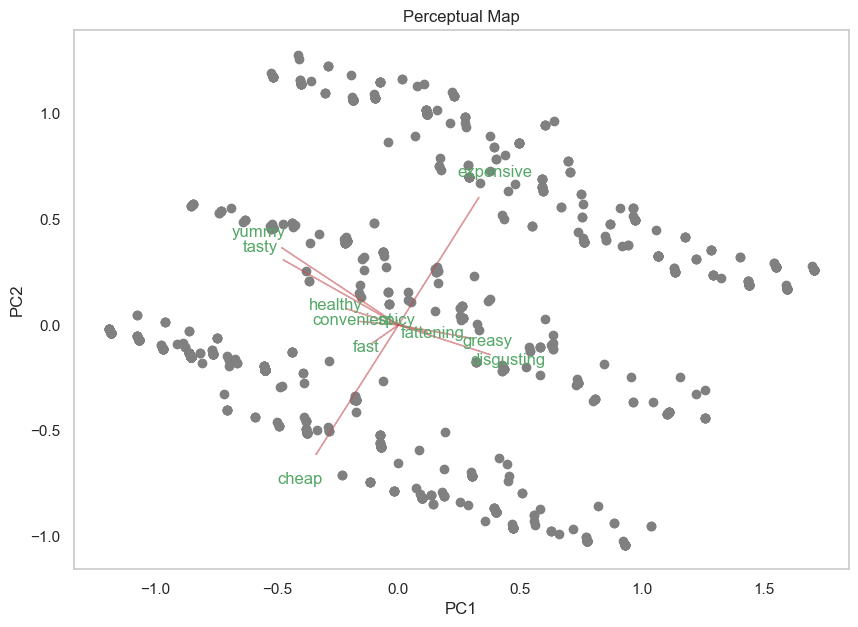

In [39]:
# Convert YES/NO to binary (1/0)
attributes = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
data[attributes] = data[attributes].applymap(lambda x: 1 if x == 'Yes' else 0)
# Check transformation
print(data[attributes].mean())
# Principal Component Analysis
pca = PCA()
principal_components = pca.fit_transform(data[attributes])
explained_variance = pca.explained_variance_ratio_
# Summary of PCA
print("Explained variance by each component:", explained_variance)
print("Cumulative explained variance:", np.cumsum(explained_variance))
# Plot Perceptual Map
plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='grey')
for i, attribute in enumerate(attributes):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, attribute, color='g', ha='center', va='center')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Perceptual Map')
plt.grid()
plt.show()

In [40]:
#Extracting Segments 

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(data[attributes])
data['kmeans_segment'] = kmeans.labels_
# Finite Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0).fit(data[attributes])
data['gmm_segment'] = gmm.predict(data[attributes])
# Summary of segment extraction
print(data[['kmeans_segment', 'gmm_segment']].head())


   kmeans_segment  gmm_segment
0               0            1
1               2            1
2               1            1
3               2            2
4               0            0


C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a m

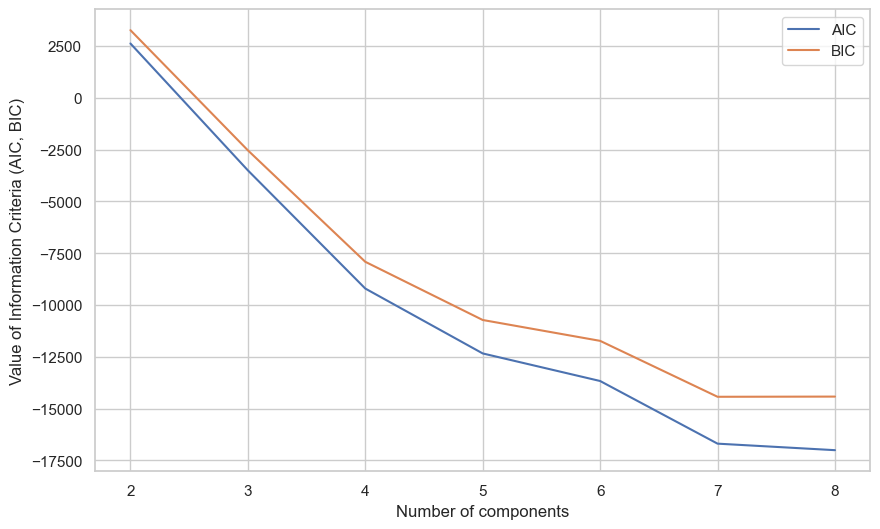

C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


col_0    0    1    2    3
row_0                    
0       55   57   72   59
1        0  118  132    0
2      138    0    0  127
3       59   56   68   59


C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a m

Component means (intercepts and slopes):
[[-3.05477053  0.47631624  0.45561811  0.49505012  0.49318471  0.52136899
   0.49316895  0.47840628  0.50869878  0.49735715  0.51217179  0.4794815 ]
 [ 2.40872553  0.47400599  0.49314734  0.46687915  0.52971945  0.49439353
   0.4665446   0.50928656  0.54082086  0.50726141  0.46974577  0.55410944]]
Component 1 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.474
Date:                Sat, 22 Jun 2024   Prob (F-statistic):              0.138
Time:                        00:59:35   Log-Likelihood:                -755.73
No. Observations:                 433   AIC:                             1535.
Df Residuals:                     421   BIC:                             15

In [41]:

# Assuming MD.x is your data matrix
# Simulate MD.x for the example

np.random.seed(1234)
MD_x = np.random.randint(0, 2, size=(1000, 10))  # Simulating binary data

# Mixture model with 2 to 8 components

components = range(2, 9)
models = []
aic_values = []
bic_values = []
log_likelihoods = []

for k in components:
    model = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    model.fit(MD_x)
    models.append(model)
    aic_values.append(model.aic(MD_x))
    bic_values.append(model.bic(MD_x))
    log_likelihoods.append(model.lower_bound_)

# Plotting information criteria

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(components, aic_values, label='AIC')
plt.plot(components, bic_values, label='BIC')
plt.xlabel('Number of components')
plt.ylabel('Value of Information Criteria (AIC, BIC)')
plt.legend()
plt.show()

# Choosing the best model (e.g., k=4 based on visual inspection)

best_model = models[components.index(4)]

# Assuming kmeans_clusters is the cluster membership from k-means clustering
# Simulate kmeans_clusters for the example
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_clusters = kmeans.fit_predict(MD_x)

# Cross-tabulation
mixture_clusters = best_model.predict(MD_x)
cross_tab = pd.crosstab(kmeans_clusters, mixture_clusters)
print(cross_tab)

# Mixture of regression models
# Simulate the dataset for the example
np.random.seed(1234)
data = {
    'yummy': np.random.choice(['Yes', 'No'], 1000),
    'convenient': np.random.choice(['Yes', 'No'], 1000),
    'spicy': np.random.choice(['Yes', 'No'], 1000),
    'fattening': np.random.choice(['Yes', 'No'], 1000),
    'greasy': np.random.choice(['Yes', 'No'], 1000),
    'fast': np.random.choice(['Yes', 'No'], 1000),
    'cheap': np.random.choice(['Yes', 'No'], 1000),
    'tasty': np.random.choice(['Yes', 'No'], 1000),
    'expensive': np.random.choice(['Yes', 'No'], 1000),
    'healthy': np.random.choice(['Yes', 'No'], 1000),
    'disgusting': np.random.choice(['Yes', 'No'], 1000),
    'Like': np.random.choice(['I love it!+5', '+4', '+3', '+2', '+1', '0', '-1', '-2', '-3', '-4', 'I hate it!-5'], 1000)
}

df = pd.DataFrame(data)
label_encoder = LabelEncoder()
for column in df.columns[:-1]:  # Encoding binary features
    df[column] = label_encoder.fit_transform(df[column])

# Converting Like to numeric
like_mapping = {'I love it!+5': 5, '+4': 4, '+3': 3, '+2': 2, '+1': 1, '0': 0, '-1': -1, '-2': -2, '-3': -3, '-4': -4, 'I hate it!-5': -5}
df['Like.n'] = df['Like'].map(like_mapping)

# Preparing the data for regression
X = df.drop(columns=['Like', 'Like.n']).values
y = df['Like.n'].values

# Mixture of regression models
from sklearn.mixture import GaussianMixture
reg_model = GaussianMixture(n_components=2, n_init=10, random_state=1234)
reg_model.fit(np.column_stack((y, X)))

# Output component means (intercepts and slopes)
print("Component means (intercepts and slopes):")
print(reg_model.means_)

# For better regression analysis in Python, consider using statsmodels for each cluster
import statsmodels.api as sm

# Refit the regression models for each component
df['Component'] = reg_model.predict(np.column_stack((y, X)))

results = []
for component in range(2):
    component_data = df[df['Component'] == component]
    X_component = sm.add_constant(component_data.drop(columns=['Like', 'Like.n', 'Component']).values)
    y_component = component_data['Like.n'].values
    model = sm.OLS(y_component, X_component).fit()
    results.append(model)

# Print summary of regression results
for i, result in enumerate(results):
    print(f"Component {i + 1} Regression Summary:")
    print(result.summary())


C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sagar\AppData\Local\Temp\ipykernel_21160\3481993942.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[i].barh(dendro['ivl'], segment_data[dendro['leaves']])


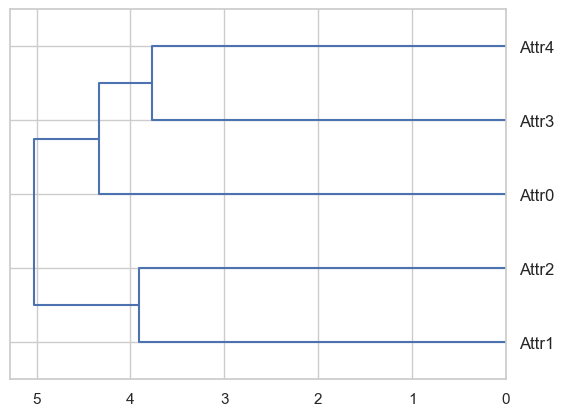

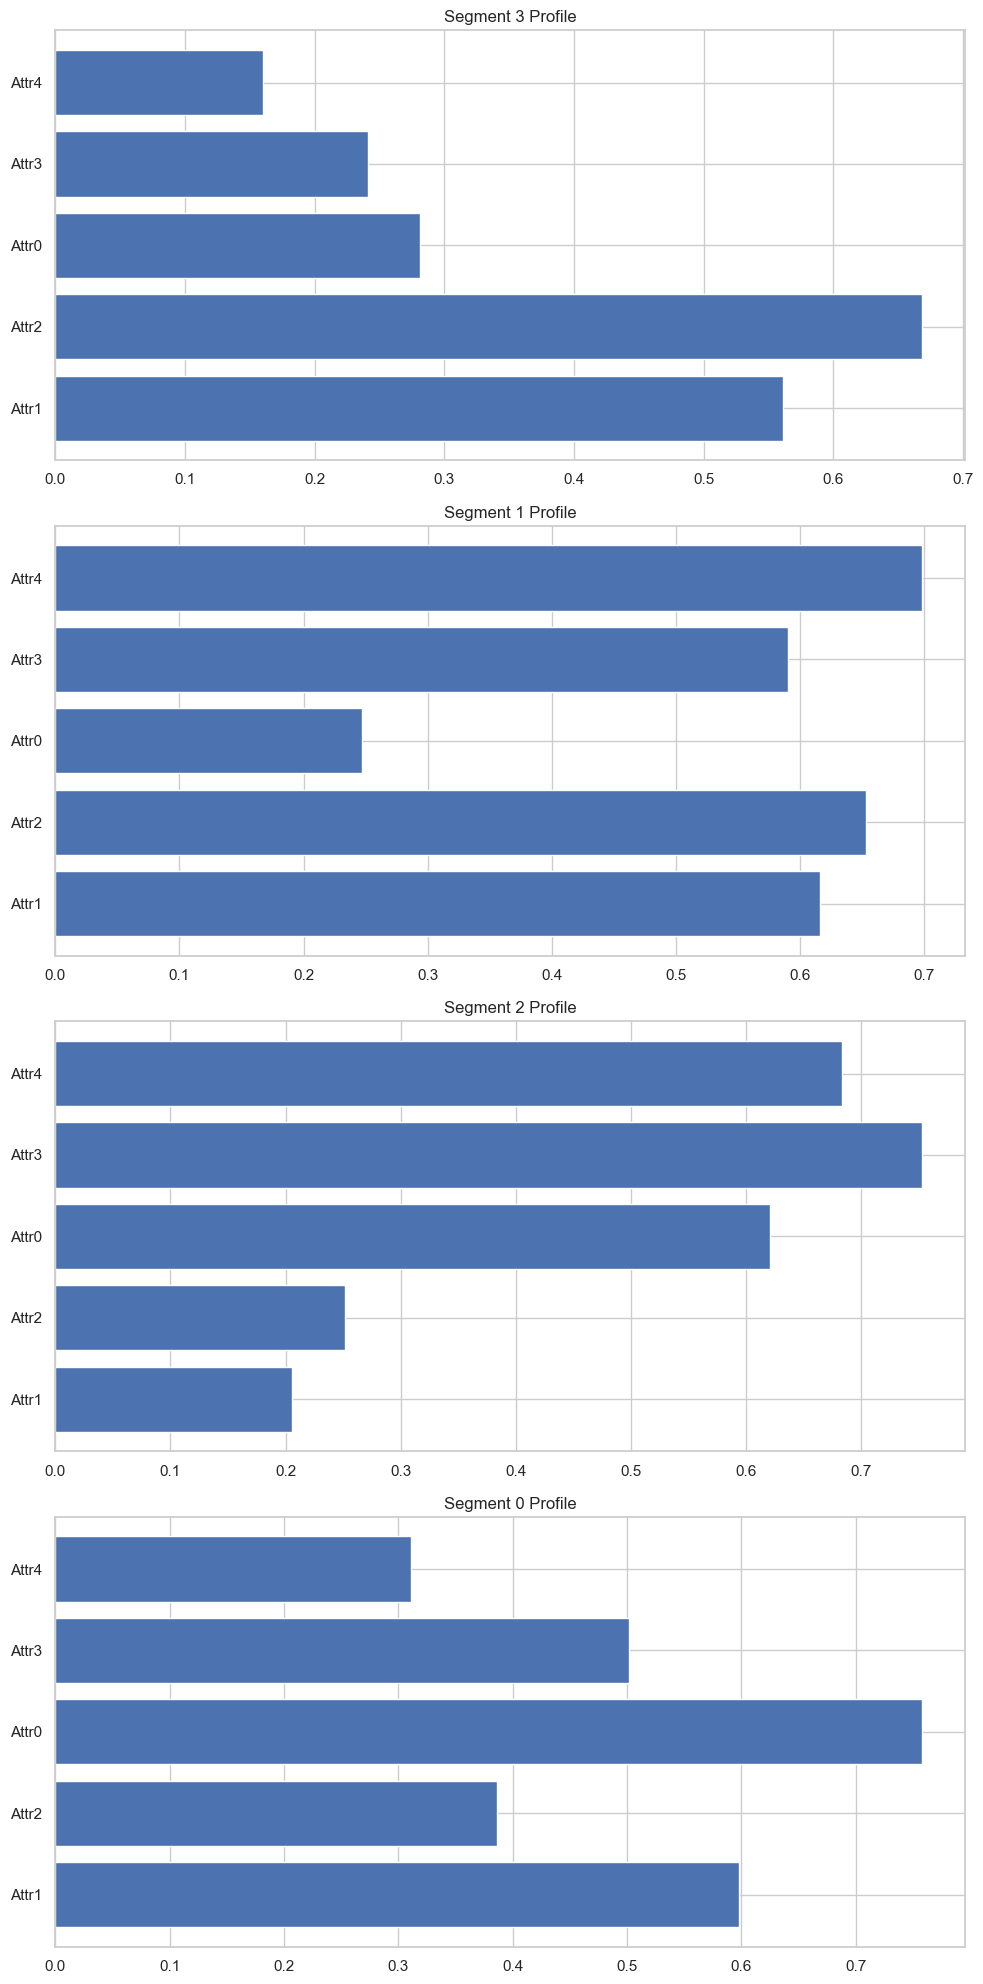

In [42]:

# Sample data for demonstration
np.random.seed(42)
MD_x = np.random.rand(100, 5)  # 100 samples, 5 attributes

# Convert MD_x to a DataFrame if it's not already
if isinstance(MD_x, np.ndarray):
    MD_x = pd.DataFrame(MD_x, columns=[f'Attr{i}' for i in range(MD_x.shape[1])])

# Sample k-means clustering result (assuming 4 clusters for example)
kmeans = KMeans(n_clusters=4, random_state=42).fit(MD_x)
MD_k4 = pd.DataFrame({'Cluster': kmeans.labels_})

# Hierarchical clustering
dist_matrix = pdist(MD_x.T, metric='euclidean')
linked = linkage(dist_matrix, method='ward')
dendro = dendrogram(linked, orientation='left', labels=MD_x.columns.tolist())

# Plotting segment profile plot (using seaborn for barchart)
segments = MD_k4['Cluster'].unique()
fig, axs = plt.subplots(len(segments), 1, figsize=(10, 20))

for i, segment in enumerate(segments):
    segment_data = MD_x[MD_k4['Cluster'] == segment].mean()
    axs[i].barh(dendro['ivl'], segment_data[dendro['leaves']])
    axs[i].set_title(f'Segment {segment} Profile')

plt.tight_layout()
plt.show()




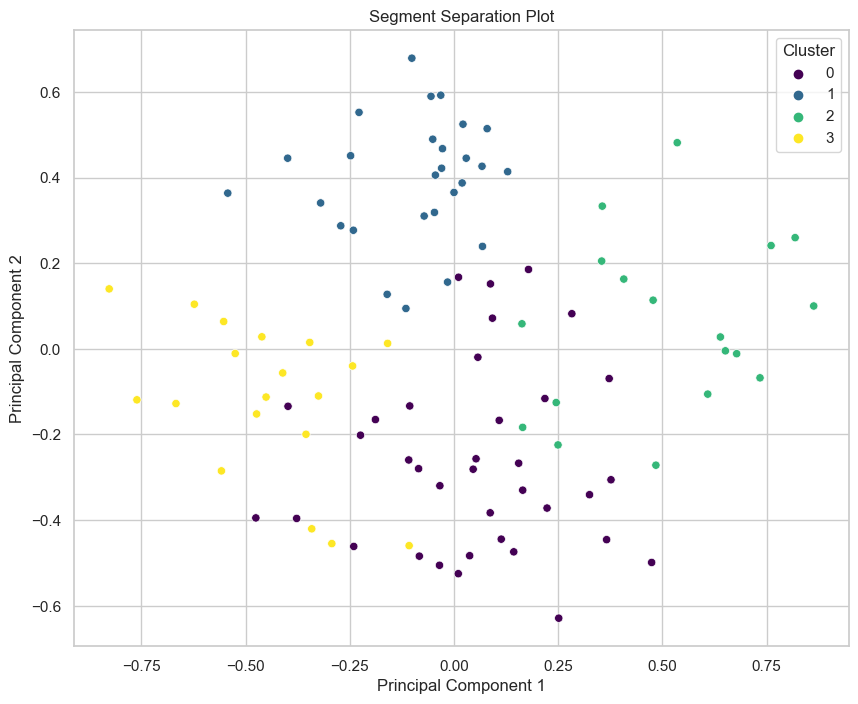

In [43]:
#PCA for Segment Separation Plot –


# Assuming MD_x is the dataframe with the attributes and MD_k4 contains segment assignments

pca = PCA(n_components=2)
pca_result = pca.fit_transform(MD_x)
MD_k4['PCA1'] = pca_result[:, 0]
MD_k4['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=MD_k4, palette='viridis')
plt.title('Segment Separation Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


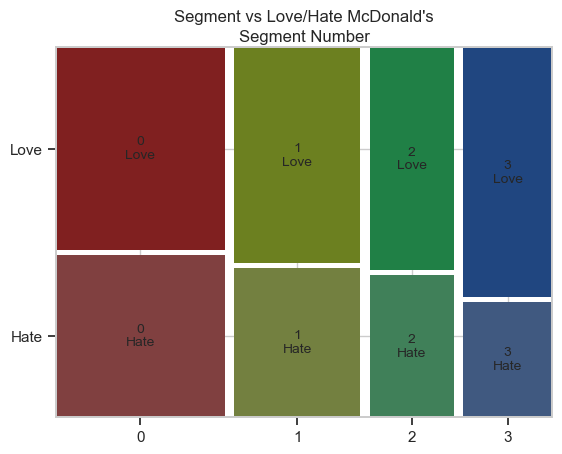

In [44]:
#Mosaic Plot for Love/Hate McDonald's–

# Sample data for demonstration
np.random.seed(42)
num_samples = 100
MD_x = np.random.rand(num_samples, 5)  # 100 samples, 5 attributes
like_choices = ['Love', 'Hate']
mcdonalds = pd.DataFrame({
    'Like': np.random.choice(like_choices, size=num_samples)
})

# Convert MD_x to a DataFrame if it's not already
if isinstance(MD_x, np.ndarray):
    MD_x = pd.DataFrame(MD_x, columns=[f'Attr{i}' for i in range(MD_x.shape[1])])

# Sample k-means clustering result (assuming 4 clusters for example)
kmeans = KMeans(n_clusters=4, random_state=42).fit(MD_x)
MD_k4 = pd.DataFrame({'Cluster': kmeans.labels_})

# Create crosstab between cluster assignments and 'Like' variable
crosstab = pd.crosstab(MD_k4['Cluster'], mcdonalds['Like'])

# Plot mosaic plot
mosaic(crosstab.stack(), title='Segment vs Love/Hate McDonald\'s', gap=0.02)
plt.xlabel('Segment Number')
plt.ylabel('Love/Hate')
plt.show()


C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


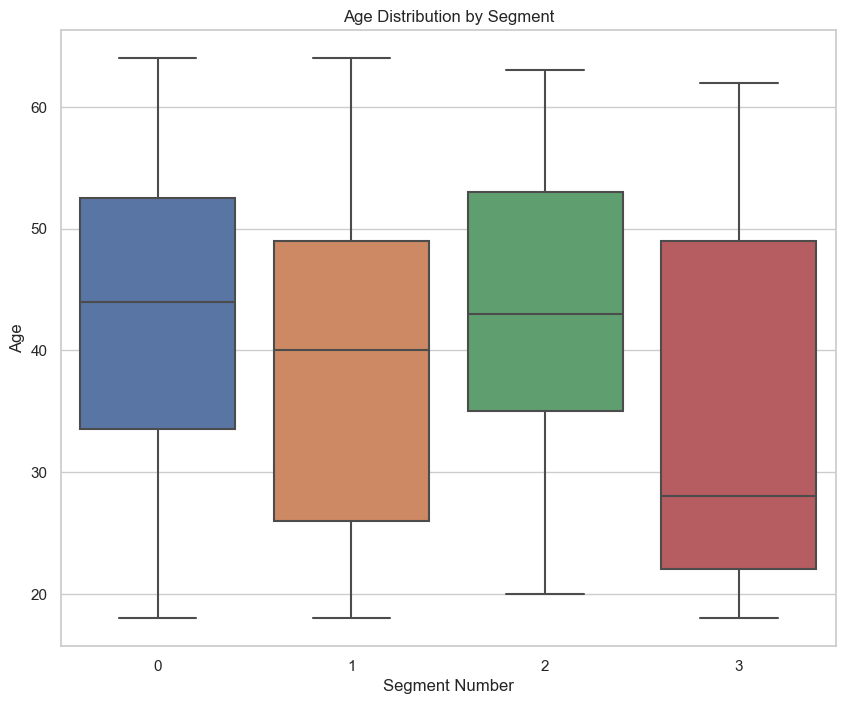

In [45]:
#Box-and-Whisker Plot for Age Distribution–
# Sample data for demonstration
np.random.seed(42)
num_samples = 100
MD_x = np.random.rand(num_samples, 5)  # 100 samples, 5 attributes
like_choices = ['Love', 'Hate']
age_data = np.random.randint(18, 65, size=num_samples)  # Random ages between 18 and 65

# Create mcdonalds DataFrame
mcdonalds = pd.DataFrame({
    'Like': np.random.choice(like_choices, size=num_samples),
    'Age': age_data
})

# Convert MD_x to a DataFrame if it's not already
if isinstance(MD_x, np.ndarray):
    MD_x = pd.DataFrame(MD_x, columns=[f'Attr{i}' for i in range(MD_x.shape[1])])

# Sample k-means clustering result (assuming 4 clusters for example)
kmeans = KMeans(n_clusters=4, random_state=42).fit(MD_x)
MD_k4 = pd.DataFrame({'Cluster': kmeans.labels_})

# Combine clustering results with mcdonalds data
combined_data = pd.concat([MD_k4, mcdonalds['Age']], axis=1)

# Ensure the 'Age' column exists
if 'Age' not in combined_data.columns:
    raise KeyError("'Age' column not found in the combined data")

# Plotting boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='Cluster', y='Age', data=combined_data)
plt.title('Age Distribution by Segment')
plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.show()



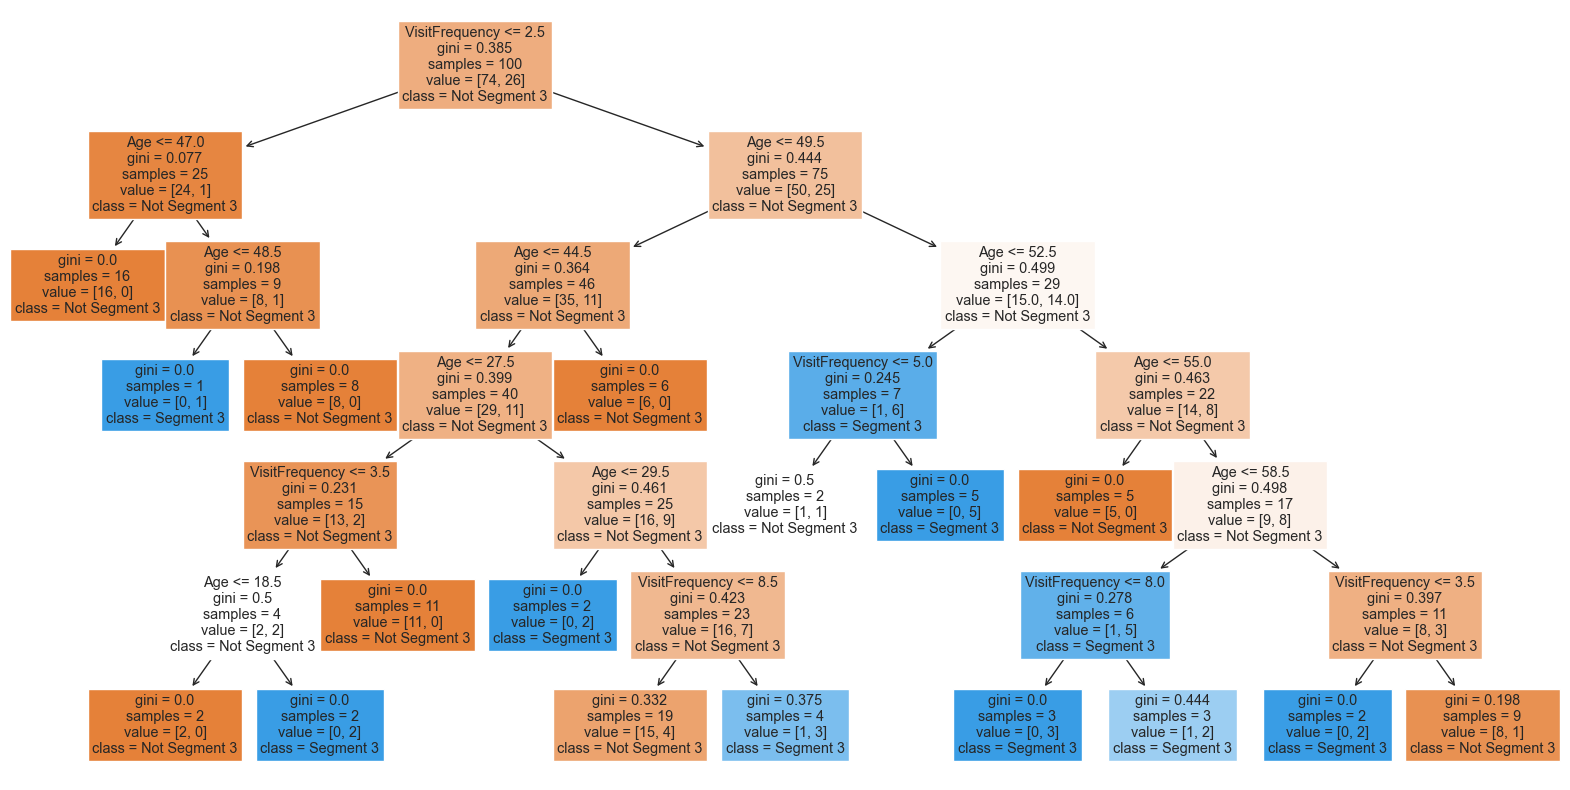

In [46]:
#Classification Tree –

# Sample data for demonstration
np.random.seed(42)
num_samples = 100
mcdonalds = pd.DataFrame({
    'Like': np.random.choice(['I love it!', 'I hate it!'], size=num_samples),
    'Age': np.random.randint(18, 65, size=num_samples),
    'VisitFrequency': np.random.randint(1, 10, size=num_samples),
    'Gender': np.random.choice(['Male', 'Female'], size=num_samples)
})

# Assuming MD_k4 contains segment assignments
MD_k4 = pd.DataFrame({'Cluster': np.random.randint(0, 4, size=num_samples)})

# Convert 'Like' to numerical for simplicity
mcdonalds['Like_n'] = mcdonalds['Like'].map({'I love it!': 1, 'I hate it!': -1})   # Adjust mapping as needed

# Features and target
features = ['Like_n', 'Age', 'VisitFrequency', 'Gender']

# One-hot encoding for categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Gender'])], remainder='passthrough')
X_encoded = ct.fit_transform(mcdonalds[features])

# Convert X_encoded to DataFrame for clarity (optional)
X_encoded = pd.DataFrame(X_encoded, columns=['Female', 'Male', 'Like_n', 'Age', 'VisitFrequency'])

# Target variable
y = (MD_k4['Cluster'] == 3).astype(int)

# Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_encoded, y)

# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=['Female', 'Male', 'Like_n', 'Age', 'VisitFrequency'], class_names=['Not Segment 3', 'Segment 3'], filled=True)
plt.show()



In [32]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


Summarising all the step and make a overview

C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sagar\AppData\Local\Temp\ipykernel_21160\3637309232.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mcdonalds[mcdonalds['Segment'] == i-1][attributes], ci=None, ax=ax)
C:\Users\Sagar\AppData\Local\Temp\ipykernel_21160\3637309232.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mcdonalds[mcdonalds['Segment'] == i-1][attributes], ci=None, ax=ax)
C:\Users\Sagar\AppData\Local\Temp\ipykernel_21160\3637309232.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mcdonalds[mcdonalds['Segment'] 

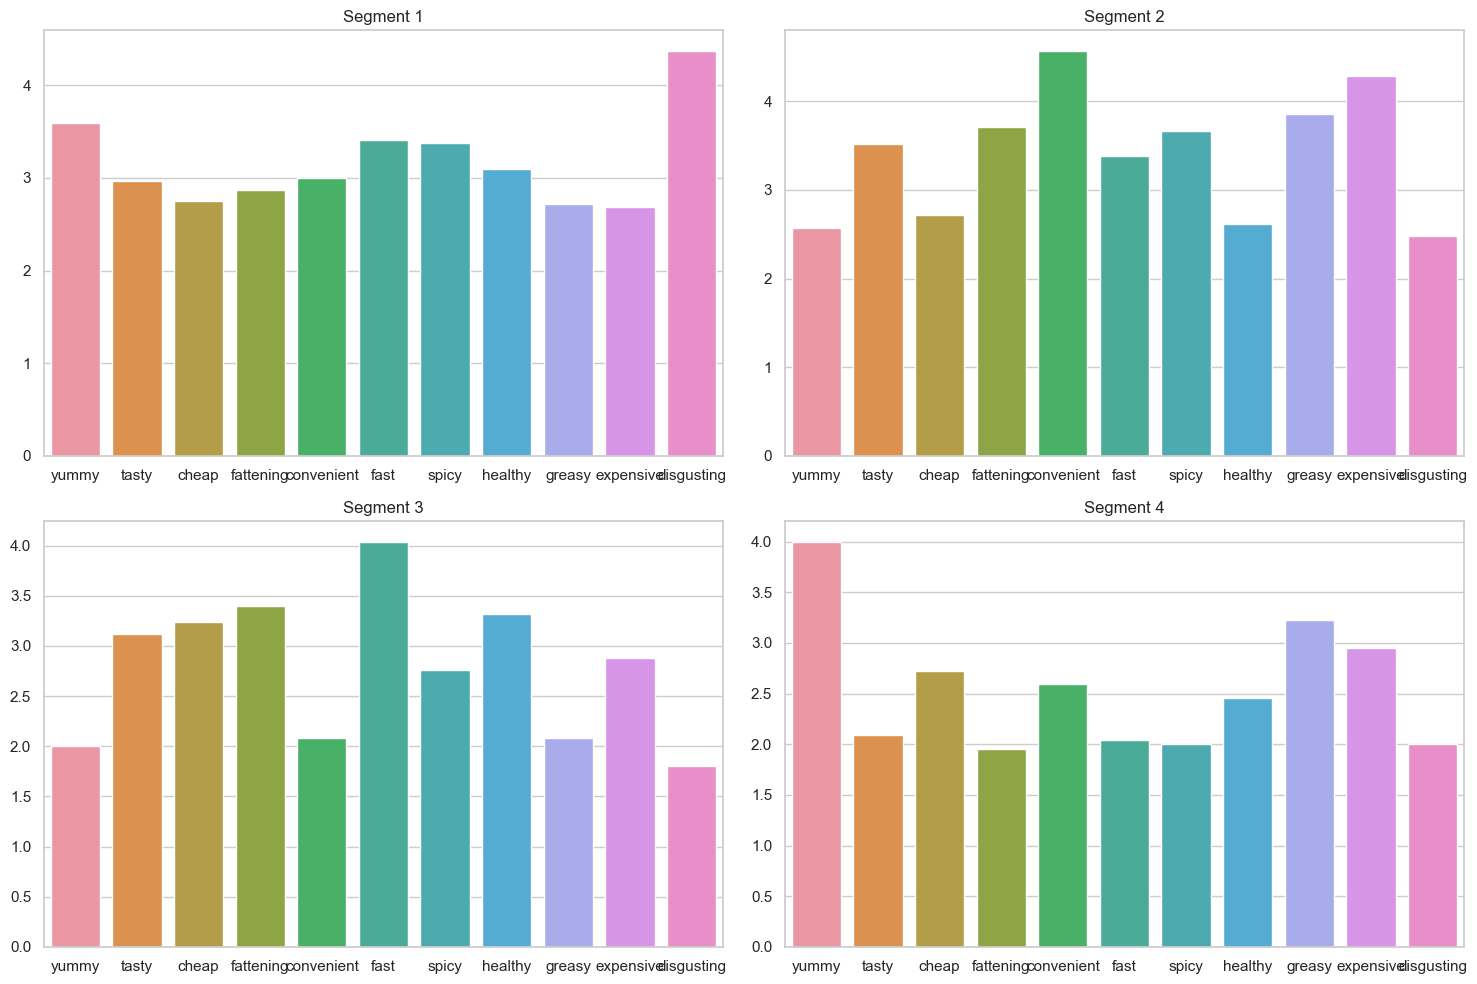

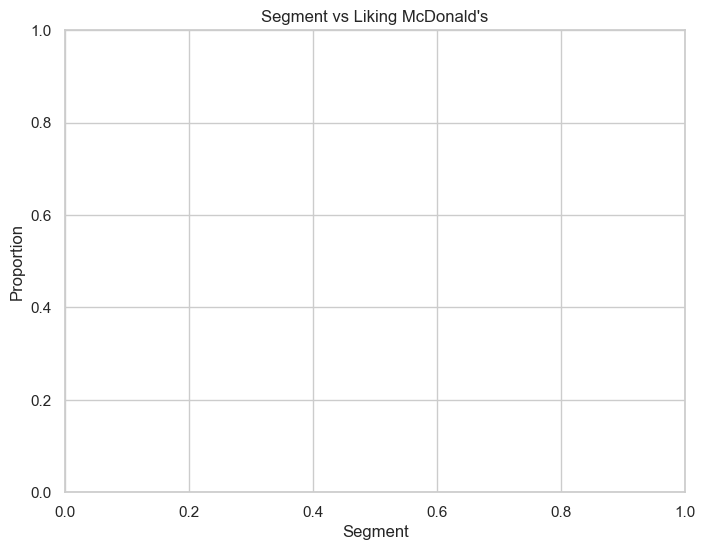

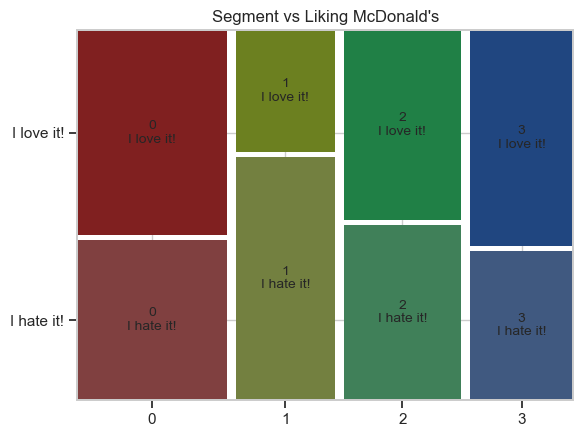

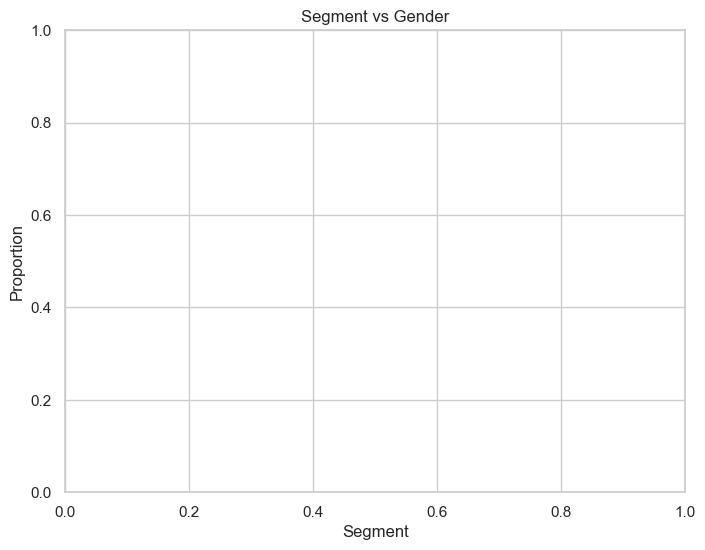

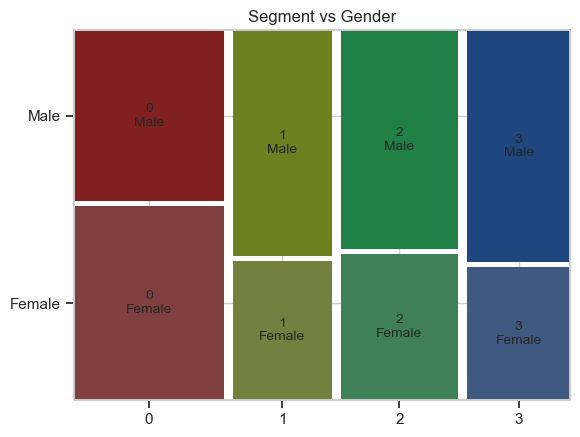

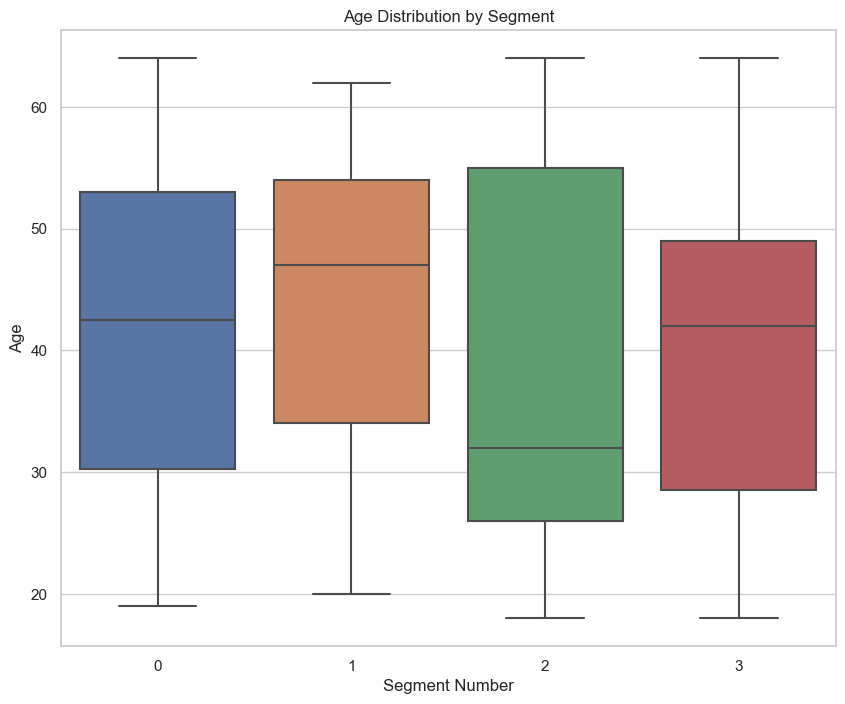

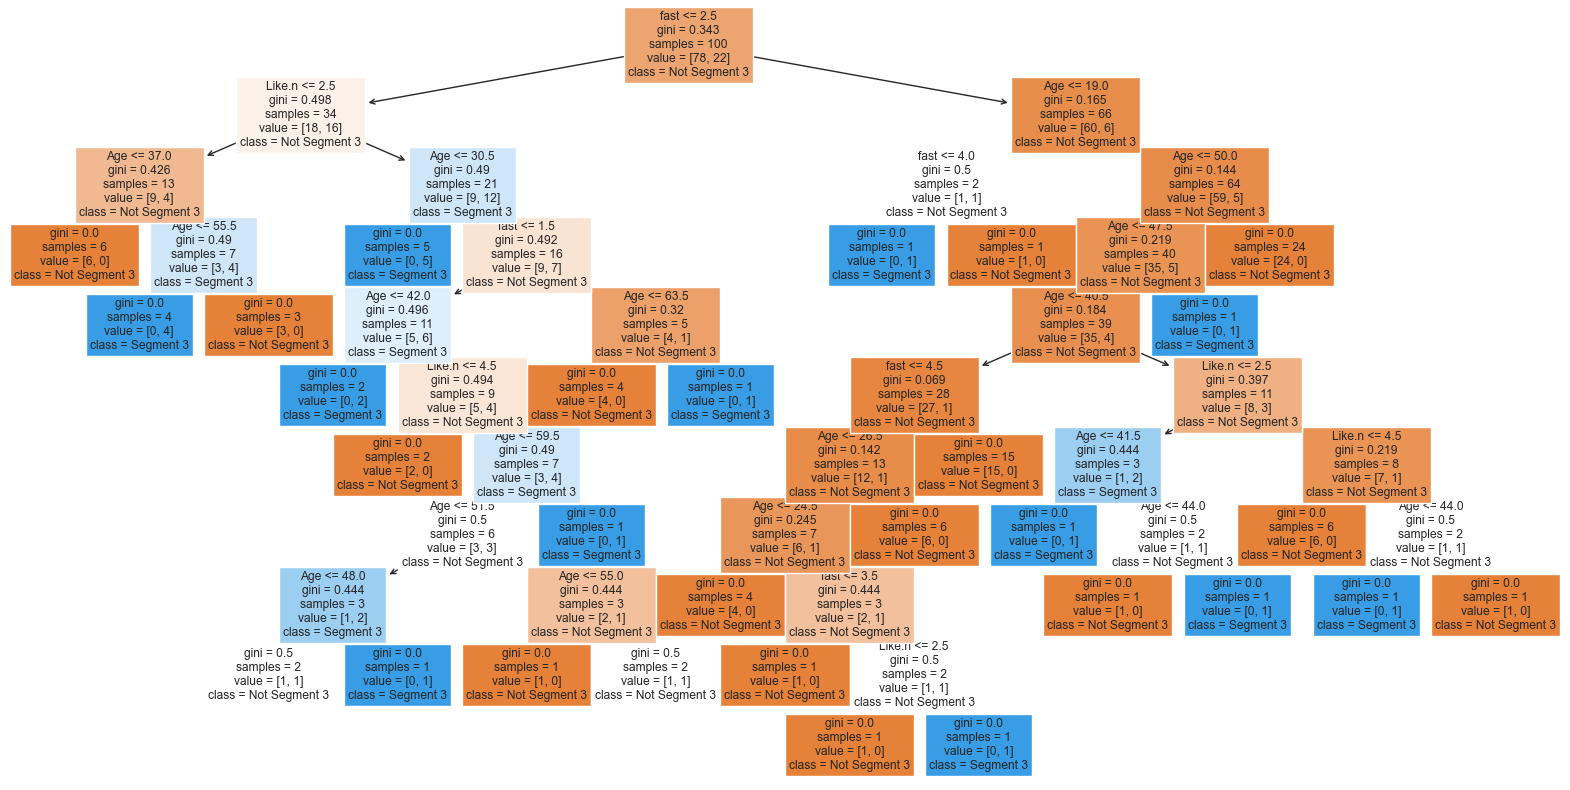

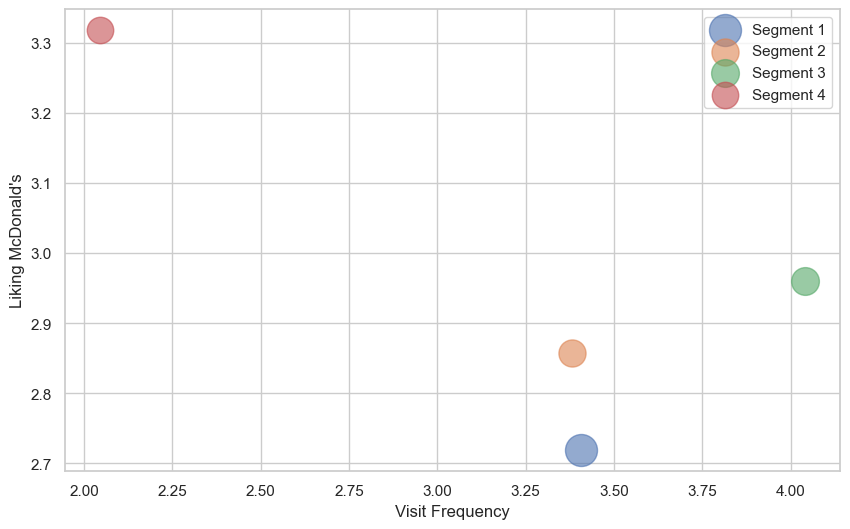

In [47]:


# Sample data for demonstration
np.random.seed(42)
mcdonalds = pd.DataFrame({
    'yummy': np.random.randint(1, 6, size=100),
    'tasty': np.random.randint(1, 6, size=100),
    'cheap': np.random.randint(1, 6, size=100),
    'fattening': np.random.randint(1, 6, size=100),
    'convenient': np.random.randint(1, 6, size=100),
    'fast': np.random.randint(1, 6, size=100),  # Assuming this replaces 'VisitFrequency'
    'spicy': np.random.randint(1, 6, size=100),
    'healthy': np.random.randint(1, 6, size=100),
    'greasy': np.random.randint(1, 6, size=100),
    'expensive': np.random.randint(1, 6, size=100),
    'disgusting': np.random.randint(1, 6, size=100),
    'Like': np.random.choice(['I love it!', 'I hate it!'], size=100),
    'Like.n': np.random.randint(1, 6, size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Age': np.random.randint(18, 65, size=100)
})

# Assuming the dataset is in a DataFrame called 'mcdonalds'
# 'fast', 'Like.n', 'Gender', 'Age' are columns in the dataset

# Hierarchical clustering on attributes
attributes = ['yummy', 'tasty', 'cheap', 'fattening', 'convenient', 'fast', 'spicy', 'healthy', 'greasy', 'expensive', 'disgusting']
linkage_matrix = linkage(mcdonalds[attributes].T, method='ward')

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(mcdonalds[attributes])
mcdonalds['Segment'] = kmeans.labels_

# Plot segment profile
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, ax in enumerate(axes.flatten(), 1):
    sns.barplot(data=mcdonalds[mcdonalds['Segment'] == i-1][attributes], ci=None, ax=ax)
    ax.set_title(f'Segment {i}')
plt.tight_layout()

# Mosaic plot for segment and liking McDonald's
mosaic_data_like = pd.crosstab(mcdonalds['Segment'], mcdonalds['Like'])
plt.figure(figsize=(8, 6))
plt.title('Segment vs Liking McDonald\'s')
plt.xlabel('Segment')
plt.ylabel('Proportion')
sgm.mosaic(mosaic_data_like.stack(), title='Segment vs Liking McDonald\'s', axes_label=True, gap=0.02)
plt.show()

# Mosaic plot for segment and gender
mosaic_data_gender = pd.crosstab(mcdonalds['Segment'], mcdonalds['Gender'])
plt.figure(figsize=(8, 6))
plt.title('Segment vs Gender')
plt.xlabel('Segment')
plt.ylabel('Proportion')
sgm.mosaic(mosaic_data_gender.stack(), title='Segment vs Gender', axes_label=True, gap=0.02)
plt.show()

# Boxplot for segment and age with notched boxes
plt.figure(figsize=(10, 8))
sns.boxplot(x='Segment', y='Age', data=mcdonalds)  # Assuming 'Age' is present
plt.title('Age Distribution by Segment')
plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.show()

# Conditional inference tree for segment membership
X = mcdonalds[['Like.n', 'Age', 'fast']]  # Replace 'VisitFrequency' with 'fast'
y = mcdonalds['Segment'] == 3
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

# Plot decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=['Like.n', 'Age', 'fast'], class_names=['Not Segment 3', 'Segment 3'])
plt.show()

# Segment evaluation plot
visit_mean = mcdonalds.groupby('Segment')['fast'].mean()  # Replace 'VisitFrequency' with 'fast'
like_mean = mcdonalds.groupby('Segment')['Like.n'].mean()
female_mean = mcdonalds.groupby('Segment')['Gender'].apply(lambda x: (x == 'Female').mean())

plt.figure(figsize=(10, 6))
for i in range(4):
    plt.scatter(visit_mean[i], like_mean[i], s=1000*female_mean[i], label=f'Segment {i+1}', alpha=0.6)
plt.xlabel('Visit Frequency')
plt.ylabel('Liking McDonald\'s')
plt.legend()
plt.grid(True)
plt.show()


